# Q1) Skeletonization

The number of times the operation is executed 7


Text(0.5, 1.0, 'Skeletonized Image')

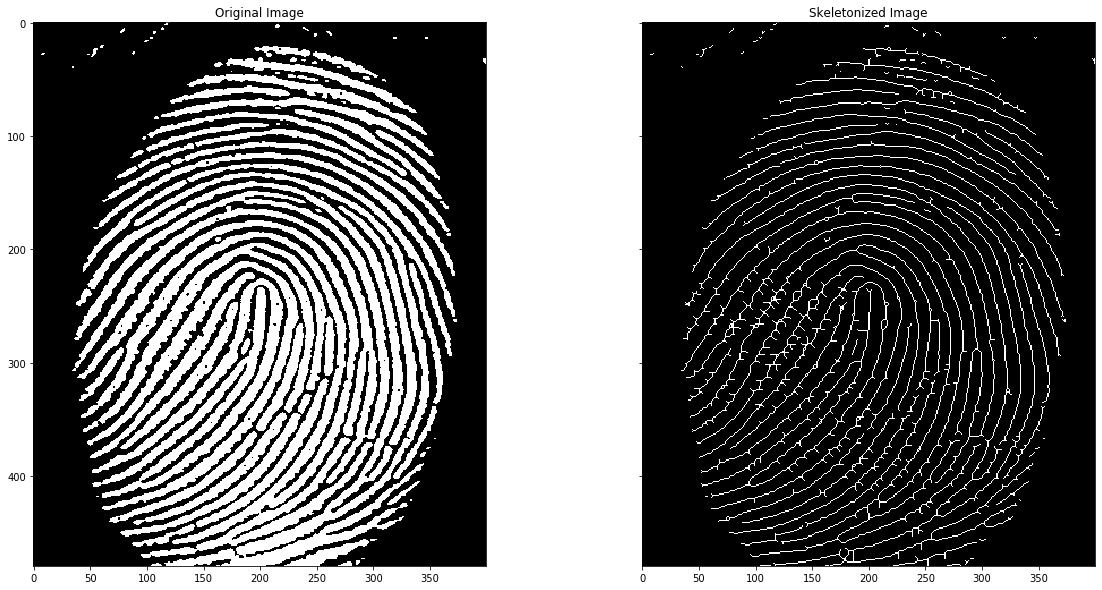

In [33]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time


img = cv.imread('input_data/skeletonization.jpg',0)
#print(img)
def thresholding(img,t):
    row = img.shape[0]
    col = img.shape[1]
    for i in range(row):
        for j in range(col):
            if(img[i][j]>t):
                img[i][j] = 0
            else:
                img[i][j] = 255
    return img

def padding(img):
        row,col = img.shape
        new_img = np.zeros((row+2,col+2))
        for i in range(row):
            for j in range(col):
                new_img[i+1][j+1] = img[i][j]
        return new_img
    
def remove_padding(img):
        row,col = img.shape
        new_img = np.zeros((row-2,col-2))
        for i in range(1,row-1):
            for j in range(1,col-1):
                new_img[i-1][j-1] = img[i][j]
        return new_img

def Compare(c,st):
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            if st[i][j]==-1:
                #print ("continue")
                continue
            if c[i][j] != st[i][j]:
                return 0
    return 1

def skeletonization_convolve(image,st):
    th = image.copy()
    st = np.asarray(st)
    ksize = st.shape[0]
    pad = padding(image)
    height = pad.shape[0]
    width = pad.shape[1]
    r_center = 0
    i=0
    for i in range(height):
        c_center = 0
        j=0
        for j in range(width):
            if i+ksize <= height and j+ksize <= width:
                cropimage = pad[i:i+ksize, j:j+ksize]
                flag = Compare(cropimage, st)
                if (flag==1):
                    th[r_center][c_center]=0
            c_center = c_center + 1
        r_center = r_center+1
    return th

def skeletonization(img):
    s1 = np.array([[0, 0, 0], [-1, 1, -1], [1, 1, 1]])
    s2 = np.array([[-1, 0, 0], [1, 1, 0], [-1, 1, -1]])
    s1_90 = np.rot90(s1,1)
    s2_90 = np.rot90(s2,1)
    s1_180 = np.rot90(s1,2)
    s2_180 = np.rot90(s2,2)
    s1_270 = np.rot90(s1,3)
    s2_270 = np.rot90(s2,3)
    
    # ROTATIONS DONE
    img = img/255.0
    i = 1
    while(1):
        img2 = skeletonization_convolve(img, s1)
        if np.array_equal(img, img2):
            out = img2*255.0
            break
        img3 = skeletonization_convolve(img2, s2)
        if np.array_equal(img2, img3):
            out = img3*255.0
            break
        img4 = skeletonization_convolve(img3, s1_90)
        if np.array_equal(img3, img4):
            out = img4*255.0
            break
        img5 = skeletonization_convolve(img4, s2_90)
        if np.array_equal(img4, img5):
            out = img5*255.0
            break
        img6 = skeletonization_convolve(img5, s1_180)
        if np.array_equal(img5, img6):
            out = img6*255.0
            break
        img7 = skeletonization_convolve(img6, s2_180)
        if np.array_equal(img6, img7):
            out = img7*255.0
            break
        img8 = skeletonization_convolve(img7, s1_270)
        if np.array_equal(img7, img8):
            out = img8*255.0
            break
        img9 = skeletonization_convolve(img8, s2_270)
        if np.array_equal(img8, img9):
            out = img9*255.0
            break
        img = img9
        i = i+1
    print ("The number of times the operation is executed",i)
    return out
    
th = thresholding(img,127)
sk = skeletonization(th)
f, ((ax1, ax2)) = plt.subplots(1, 2, sharey=True, figsize=(20,10))
ax1.imshow(th, cmap = 'gray')
ax1.set_title('Original Image')

ax2.imshow(sk, cmap = 'gray')
ax2.set_title('Skeletonized Image')

# 2. Explain the role of structuring elements S1,S2.

The role of structuring elements is to thinning of the image but with S1 and rotation of S1 we are getting edges present in all directions and with help of S2 and rotation of S2 we are getting corner elements present in all directions.

# 3.  By analyzing the outputs at the end of each skeletonization pass, explain why multiple passes are/may be required. 

In skeletanization process at each step we are detecting edges and corners by using S1 and S2 and their rotated versions. And then iterating this
entire process continues until we observe no changes in the image. In skeletinization process we are thinning the image. So when the skeletanization process is completed no matter
how many time we apply structuring elements we will not observe any change in the image. So we
stop when we observe no change. So multiple iterations are required to make it more thin and at the end we obtain image with
single pixel level structures.

The number of times the operation is executed 23
The number of times the operation is executed 3


Text(0.5, 1.0, 'Skeletonized Image')

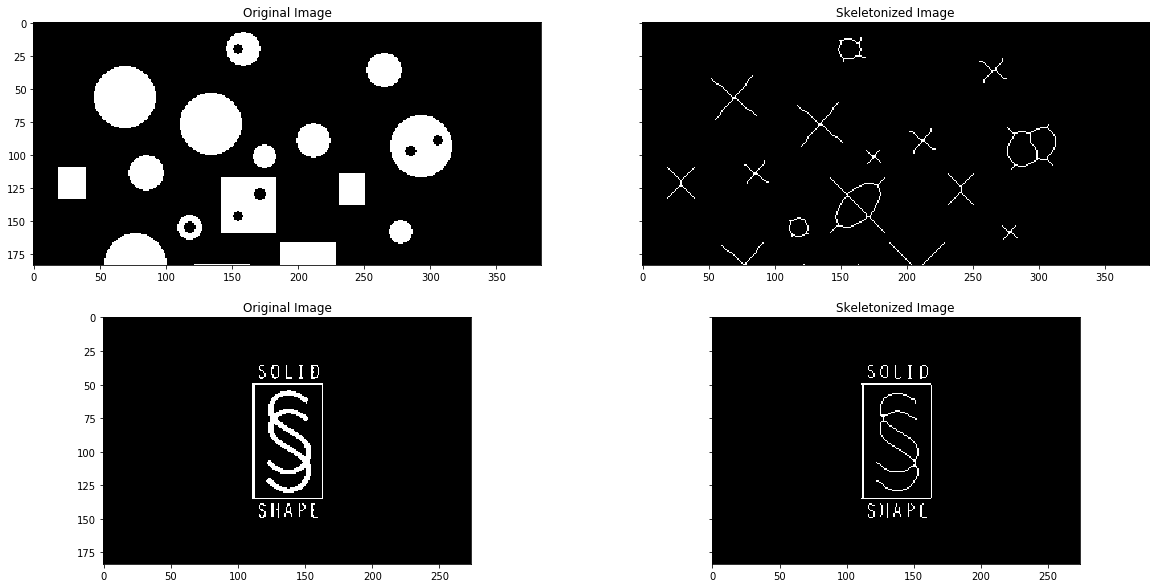

In [276]:
def thresholding(img,t):
    row = img.shape[0]
    col = img.shape[1]
    for i in range(row):
        for j in range(col):
            if(img[i][j]>t):
                img[i][j] = 255
            else:
                img[i][j] = 0
    return img

img1 = cv.imread('input_data/objects.png',0)
th1 = thresholding(img1,127)
sk1 = skeletonization(th1)


img3 = cv.imread('input_data/b.png',0)
th3 = thresholding(img3,127)
sk3 = skeletonization(th3)

f, ((ax1, ax2),(ax5,ax6)) = plt.subplots(2, 2, sharey=True, figsize=(20,10))
ax1.imshow(th1, cmap = 'gray')
ax1.set_title('Original Image')

ax2.imshow(sk1, cmap = 'gray')
ax2.set_title('Skeletonized Image')

ax5.imshow(th3, cmap = 'gray')
ax5.set_title('Original Image')

ax6.imshow(sk3, cmap = 'gray')
ax6.set_title('Skeletonized Image')

The number of times the operation is executed 9


Text(0.5, 1.0, 'Skeletonized Image')

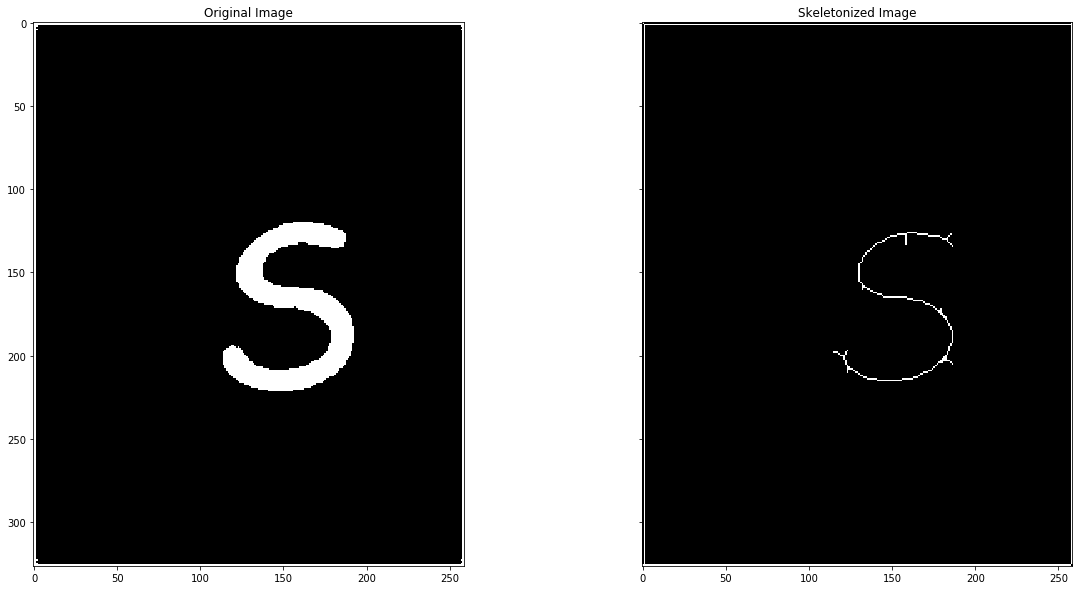

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time

def thresholding(img,t):
    row = img.shape[0]
    col = img.shape[1]
    for i in range(row):
        for j in range(col):
            if(img[i][j]>t):
                img[i][j] = 255
            else:
                img[i][j] = 0
    return img

def padding(img):
        row,col = img.shape
        new_img = np.zeros((row+2,col+2))
        for i in range(row):
            for j in range(col):
                new_img[i+1][j+1] = img[i][j]
        return new_img
    
def remove_padding(img):
        row,col = img.shape
        new_img = np.zeros((row-2,col-2))
        for i in range(1,row-1):
            for j in range(1,col-1):
                new_img[i-1][j-1] = img[i][j]
        return new_img

def Compare(c,st):
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            if st[i][j]==-1:
                #print ("continue")
                continue
            if c[i][j] != st[i][j]:
                return 0
    return 1

def skeletonization_convolve(image,st):
    th = image.copy()
    st = np.asarray(st)
    ksize = st.shape[0]
    pad = padding(image)
    height = pad.shape[0]
    width = pad.shape[1]
    r_center = 0
    i=0
    for i in range(height):
        c_center = 0
        j=0
        for j in range(width):
            if i+ksize <= height and j+ksize <= width:
                cropimage = pad[i:i+ksize, j:j+ksize]
                flag = Compare(cropimage, st)
                if (flag==1):
                    th[r_center][c_center]=0
            c_center = c_center + 1
        r_center = r_center+1
    return th

def skeletonization(img):
    s1 = np.array([[0, 0, 0], [-1, 1, -1], [1, 1, 1]])
    s2 = np.array([[-1, 0, 0], [1, 1, 0], [-1, 1, -1]])
    s1_90 = np.rot90(s1,1)
    s2_90 = np.rot90(s2,1)
    s1_180 = np.rot90(s1,2)
    s2_180 = np.rot90(s2,2)
    s1_270 = np.rot90(s1,3)
    s2_270 = np.rot90(s2,3)
    
    # ROTATIONS DONE
    img = img/255.0
    i = 1
    while(1):
        img2 = skeletonization_convolve(img, s1)
        if np.array_equal(img, img2):
            out = img2*255.0
            break
        img3 = skeletonization_convolve(img2, s2)
        if np.array_equal(img2, img3):
            out = img3*255.0
            break
        img4 = skeletonization_convolve(img3, s1_90)
        if np.array_equal(img3, img4):
            out = img4*255.0
            break
        img5 = skeletonization_convolve(img4, s2_90)
        if np.array_equal(img4, img5):
            out = img5*255.0
            break
        img6 = skeletonization_convolve(img5, s1_180)
        if np.array_equal(img5, img6):
            out = img6*255.0
            break
        img7 = skeletonization_convolve(img6, s2_180)
        if np.array_equal(img6, img7):
            out = img7*255.0
            break
        img8 = skeletonization_convolve(img7, s1_270)
        if np.array_equal(img7, img8):
            out = img8*255.0
            break
        img9 = skeletonization_convolve(img8, s2_270)
        if np.array_equal(img8, img9):
            out = img9*255.0
            break
        img = img9
        i = i+1
    print ("The number of times the operation is executed",i)
    return out


img1 = cv.imread('input_data/a.png',0)
th1 = thresholding(img1,127)
sk1 = skeletonization(th1)

f, ((ax1, ax2)) = plt.subplots(1, 2, sharey=True, figsize=(20,10))
ax1.imshow(th1, cmap = 'gray')
ax1.set_title('Original Image')

ax2.imshow(sk1, cmap = 'gray')
ax2.set_title('Skeletonized Image')


## Q2) Find the organs of interest in the provided CT image kidney.jpg. The organs of interest are as shown below


21.69146490097046
25.2395179271698
2.8100745677948


Text(0.5, 1.0, 'Labelled Image')

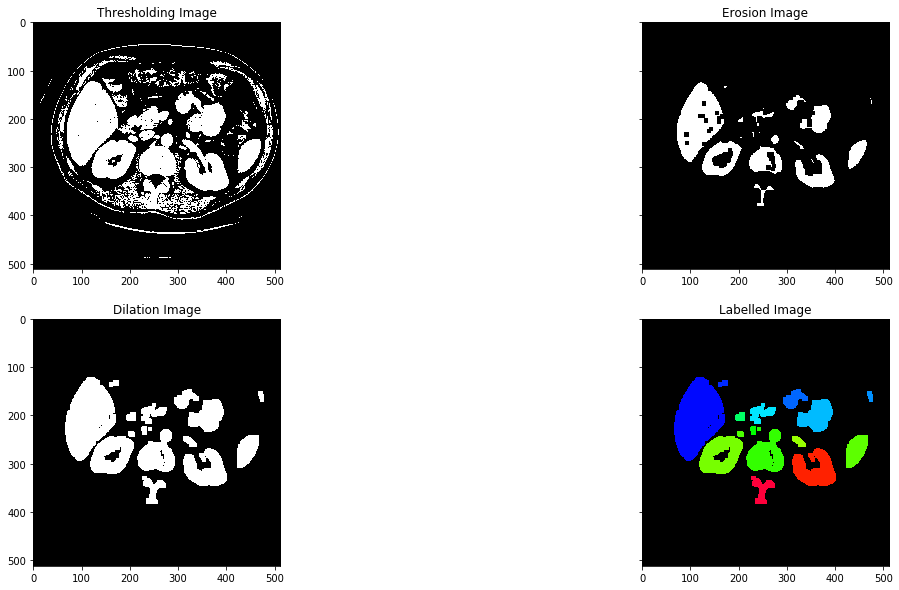

In [116]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from disjoint_set import DisjointSet

img = cv.imread('input_data/kidney.jpg',0)

def thresholding(img,t):
    row = img.shape[0]
    col = img.shape[1]
    for i in range(row):
        for j in range(col):
            if(img[i][j]>t):
                img[i][j] = 255
            else:
                img[i][j] = 0
    return img


def erosion(img,st):
    start = time.time()
    st = np.ones((st,st)) 
    img = img /255
    rows,cols=img.shape
    row_k,col_k = st.shape
    new_img= np.zeros((rows,cols)).astype(np.uint8)
    center = int(row_k/2)
    for x in range(0,rows-row_k):
        for y in range(0,cols-col_k):
            compare_ele = img[x+1:x+(row_k+1),y+1:y+(col_k+1)]
            #print(compare_ele.shape)
            if(np.allclose(compare_ele, st)):
                new_img[x+center,y+center] =  img[x+center,y+center]
    time_taken=time.time()-start
    print(time_taken)
    return new_img*255

def dilation(img,st):
    start = time.time()
    st = np.ones((st,st)) 
    img = img /255
    rows,cols=img.shape
    row_k,col_k = st.shape
    new_img= np.zeros((rows,cols)).astype(np.uint8)
    center = int(row_k/2)
    for x in range(0,rows-row_k):
        for y in range(0,cols-col_k):
            compare_ele = img[x+1:x+(row_k+1),y+1:y+(col_k+1)]
            #print(compare_ele.shape)
            if((compare_ele==st).any()):
                new_img[x+center,y+center] =  1
    time_taken=time.time()-start
    print(time_taken)
    return new_img*255

def opening(th,k_er,k_dil):
    er = erosion(th,k_er)
    er = erosion(er,3)
    di = dilation(er,k_dil)
    return er,di

def padding(img):
    row,col = img.shape
    new_img = np.zeros((row+2,col+2))
    for i in range(row):
        for j in range(col):
            new_img[i+1][j+1] = img[i][j]
    return new_img

def remove_padding(img):
    row,col = img.shape
    new_img = np.zeros((row-2,col-2))
    for i in range(1,row-1):
        for j in range(1,col-1):
            new_img[i-1][j-1] = img[i][j]
    return new_img

def Connected_Component(img,connectivity):
        #img = img /255
        ds = DisjointSet()
        rows,cols=img.shape
        new_img= np.zeros((rows,cols)).astype(np.uint8)
        rows = rows-2
        cols = cols-2
        cc=0
        # First Pass of CC (8 connectivity)
        for x in range(1,rows+1):
            prev,curr = 0,0
            for y in range(1,cols+1):
                arr = np.zeros(8)
                curr = img[x][y]
                if(curr == 0):
                    prev = curr
                elif(curr!=0):    
                    arr[1] = new_img[x-1,y]
                    arr[3] = new_img[x,y-1]
                    arr[4] = new_img[x,y+1]
                    arr[6] = new_img[x+1,y]
                    
                    if(connectivity == 8):
                        arr[0] = new_img[x-1,y-1]
                        arr[2] = new_img[x-1,y+1]
                        arr[5] = new_img[x+1,y-1]
                        arr[7] = new_img[x+1,y+1]

                    a = arr[arr!=0]

                    # if prev is zero and there are no neighbours in new img then increment cc and that will be center pixel label
                    # else if there are neighbours then minimum element will be my center pixel label and will use union_find set
                    if(prev==0 and (len(a)==0)):
                        cc = cc+1
                        new_img[x,y]=cc
                    elif(len(a)!=0):
                        #print(len(a))
                        minn = np.min(a)
                        new_img[x,y]=minn
                        #print(minn)
                        for i in range(len(a)):
                            ds.union(a[i],minn)
                prev = curr

        # Second Pass of CC
        for x in range(1,rows+1):
            for y in range(1,cols+1):
                p = new_img[x][y]
                if(p!=0):
                    new_img[x][y]=ds.find(p)

        #print(ds)
        new_img=remove_padding(new_img)
        return new_img,len(list(ds.itersets()))
    
def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(127*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue,blank_ch,blank_ch])

    # cvt to BGR for display
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    return labeled_img


th = thresholding(img,129)
er,separate_img=opening(img,7,9)
pad = padding(separate_img)
c,cc = Connected_Component(pad,8)
l = imshow_components(c)

f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize=(20,10))
ax1.imshow(th, cmap = 'gray')
ax1.set_title('Thresholding Image')

ax2.imshow(er, cmap = 'gray')
ax2.set_title('Erosion Image')

ax3.imshow(separate_img, cmap = 'gray')
ax3.set_title('Dilation Image')

ax4.imshow(l, cmap = 'gray')
ax4.set_title('Labelled Image')


## Q3) Read in the binary image coins.jpg and Write a script which uses the image as input and outputs a new image containing


1. only the coins touching the boundary of the image 

Total Connected Components = 130


c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:113: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


Number of coins touching boundary = 10


Text(0.5, 1.0, 'Coins at Boundary')

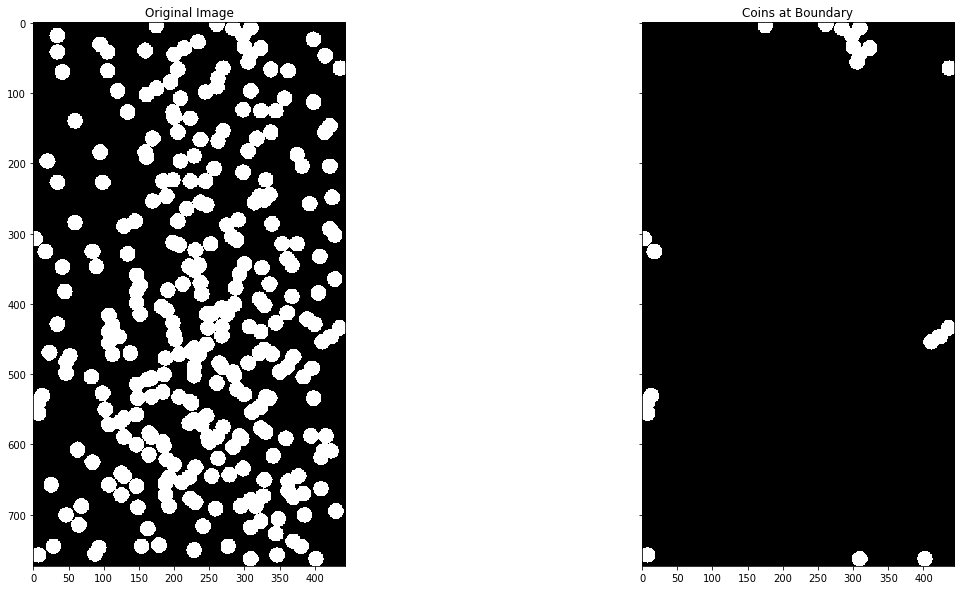

In [196]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from disjoint_set import DisjointSet


def thresholding(img,t):
    row = img.shape[0]
    col = img.shape[1]
    for i in range(row):
        for j in range(col):
            if(img[i][j]>t):
                img[i][j] = 255
            else:
                img[i][j] = 0
    return img

def padding(img):
        row,col = img.shape
        new_img = np.zeros((row+2,col+2))
        for i in range(row):
            for j in range(col):
                new_img[i+1][j+1] = img[i][j]
        return new_img

def remove_padding(img):
        row,col = img.shape
        new_img = np.zeros((row-2,col-2))
        for i in range(1,row-1):
            for j in range(1,col-1):
                new_img[i-1][j-1] = img[i][j]
        return new_img

def Connected_Component(img,connectivity):
        #img = img /255
        ds = DisjointSet()
        rows,cols=img.shape
        new_img= np.zeros((rows,cols)).astype(np.uint8)
        rows = rows-2
        cols = cols-2
        cc=0
        # First Pass of CC (8 connectivity)
        for x in range(1,rows+1):
            prev,curr = 0,0
            for y in range(1,cols+1):
                arr = np.zeros(8)
                curr = img[x][y]
                if(curr == 0):
                    prev = curr
                elif(curr!=0):    
                    arr[1] = new_img[x-1,y]
                    arr[3] = new_img[x,y-1]
                    arr[4] = new_img[x,y+1]
                    arr[6] = new_img[x+1,y]
                    
                    if(connectivity == 8):
                        arr[0] = new_img[x-1,y-1]
                        arr[2] = new_img[x-1,y+1]
                        arr[5] = new_img[x+1,y-1]
                        arr[7] = new_img[x+1,y+1]

                    a = arr[arr!=0]

                    # if prev is zero and there are no neighbours in new img then increment cc and that will be center pixel label
                    # else if there are neighbours then minimum element will be my center pixel label and will use union_find set
                    if(prev==0 and (len(a)==0)):
                        cc = cc+1
                        new_img[x,y]=cc
                    elif(len(a)!=0):
                        #print(len(a))
                        minn = np.min(a)
                        new_img[x,y]=minn
                        #print(minn)
                        for i in range(len(a)):
                            ds.union(a[i],minn)
                prev = curr

        # Second Pass of CC
        for x in range(1,rows+1):
            for y in range(1,cols+1):
                p = new_img[x][y]
                if(p!=0):
                    new_img[x][y]=ds.find(p)

        #print(ds)
        new_img=remove_padding(new_img)
        return new_img,len(list(ds.itersets()))
    
def boundary_circles(label_img):
    row, col =label_img.shape
    
    # works when image height and width is same
    # getting boundaries
    up = label_img[0]
    down = label_img[row-1]
    left = label_img[:,0]
    right = label_img[:,col-1]
    
    # getting boundaries label
    b_label=[]
    b_label = np.append(b_label,np.unique(up[up!=0]))
    b_label = np.append(b_label,np.unique(down[down!=0]))
    b_label = np.append(b_label,np.unique(left[left!=0]))
    b_label = np.append(b_label,np.unique(right[right!=0]))
    b_label = np.unique(b_label)
    
    
    new_img = np.zeros((row,col))
    for i in range(row):
        for j in range(col):
            if(b_label[np.where(b_label == label_img[i][j])]):
                new_img[i][j] = 1
                
    
    return new_img*255,len(b_label)

img = cv.imread('input_data/coins.jpg',0)
th = thresholding(img,127)
#pad = padding(th)
#label_img,ret = Connected_Component(pad,4)
ret,label_img= cv.connectedComponents(th)
print('Total Connected Components =',ret)
b_img,b_cc = boundary_circles(label_img)
print('Number of coins touching boundary =',b_cc)
f, ((ax1,ax2)) = plt.subplots(1, 2, sharey=True, figsize=(20,10))
ax1.imshow(th, cmap = 'gray')
ax1.set_title('Original Image')

ax2.imshow(b_img, cmap = 'gray')
ax2.set_title('Coins at Boundary')

2. only the coins which overlap with each other 
3. only non-overlapping coins

Text(0.5, 1.0, 'Non Overlap Image')

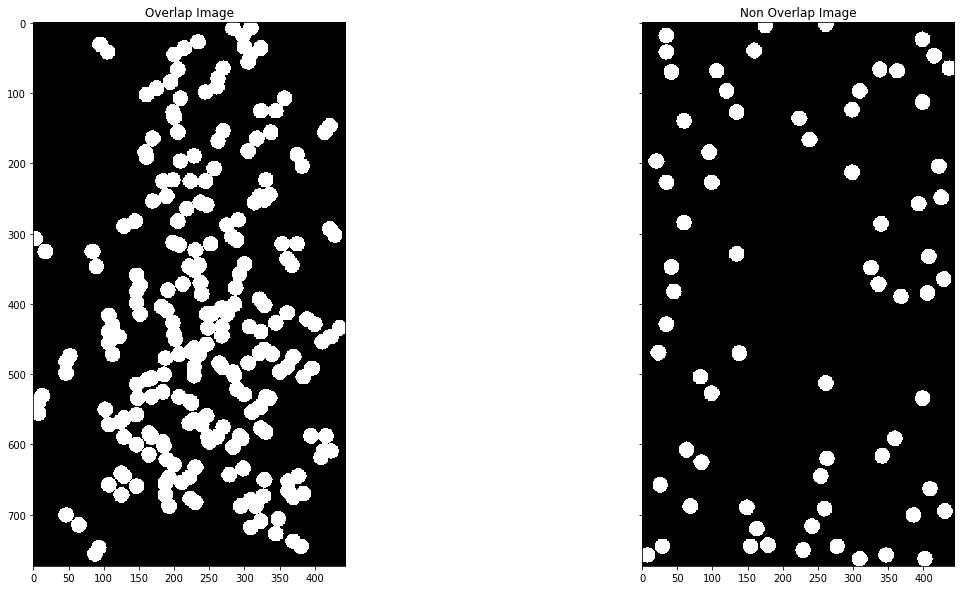

In [159]:
def overlap_and_non_overlap(img_label):
    row,col = img_label.shape
    overlap_img = np.zeros((row,col))
    non_overlap_img = np.zeros((row,col))
    above_thresh = []
    below_thresh = []
    unique_labels, count = np.unique(img_label, return_counts=True)
    d = dict(zip(unique_labels, count))
    
    for (key, val) in d.items():
        if(val < 400):
            below_thresh.append(key)
        else:
            above_thresh.append(key)
    above_thresh = above_thresh[1:]
    for i in range(row):
        for j in range(col):
            if(np.any(below_thresh == img_label[i][j])):
                non_overlap_img[i][j] = 255

            if np.any(above_thresh == img_label[i, j]):
                overlap_img[i, j] = 255    
    
    return overlap_img, non_overlap_img

overlap,nonoverlap = overlap_and_non_overlap(label_img)
f, ((ax1,ax2)) = plt.subplots(1, 2, sharey=True, figsize=(20,10))
ax1.imshow(overlap, cmap = 'gray')
ax1.set_title('Overlap Image')

ax2.imshow(nonoverlap, cmap = 'gray')
ax2.set_title('Non Overlap Image')

## Q4) Read in the binary image objects.png and Write a script which uses the image as input and uses morphological and logical operations to answer the questions below.


1. How many objects have one or more holes?

Number of Objects having holes or more holes = 6


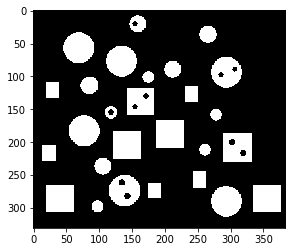

In [210]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from disjoint_set import DisjointSet
def thresholding(img,t):
    row = img.shape[0]
    col = img.shape[1]
    for i in range(row):
        for j in range(col):
            if(img[i][j]>t):
                img[i][j] = 255
            else:
                img[i][j] = 0
    return img

def Connected_Component(img,connectivity):
        #img = img /255
        ds = DisjointSet()
        rows,cols=img.shape
        new_img= np.zeros((rows,cols)).astype(np.uint8)
        rows = rows-2
        cols = cols-2
        cc=0
        # First Pass of CC (8 connectivity)
        for x in range(1,rows+1):
            prev,curr = 0,0
            for y in range(1,cols+1):
                arr = np.zeros(8)
                curr = img[x][y]
                if(curr == 0):
                    prev = curr
                elif(curr!=0):    
                    arr[1] = new_img[x-1,y]
                    arr[3] = new_img[x,y-1]
                    arr[4] = new_img[x,y+1]
                    arr[6] = new_img[x+1,y]
                    
                    if(connectivity == 8):
                        arr[0] = new_img[x-1,y-1]
                        arr[2] = new_img[x-1,y+1]
                        arr[5] = new_img[x+1,y-1]
                        arr[7] = new_img[x+1,y+1]

                    a = arr[arr!=0]

                    # if prev is zero and there are no neighbours in new img then increment cc and that will be center pixel label
                    # else if there are neighbours then minimum element will be my center pixel label and will use union_find set
                    if(prev==0 and (len(a)==0)):
                        cc = cc+1
                        new_img[x,y]=cc
                    elif(len(a)!=0):
                        #print(len(a))
                        minn = np.min(a)
                        new_img[x,y]=minn
                        #print(minn)
                        for i in range(len(a)):
                            ds.union(a[i],minn)
                prev = curr

        # Second Pass of CC
        for x in range(1,rows+1):
            for y in range(1,cols+1):
                p = new_img[x][y]
                if(p!=0):
                    new_img[x][y]=ds.find(p)

        #print(ds)
        new_img=remove_padding(new_img)
        labels = np.unique(new_img[new_img!=0])
        return new_img,len(list(ds.itersets())),labels



def getNumberOfHoles(img):
    row,col = img.shape
    for i in range(row):
        for j in range(col):
            if(img[i][j]==1):
                img[i][j] = 0
            else:
                img[i][j] = 1
    
    label_img,ret,l = Connected_Component(img,8)
    return ret-1

def ObjectList(label_img,labels):
    row,col = label_img.shape
    object_list =[]
    
    for label in labels:
        temp = np.zeros((row,col))
        for i in range(row):
            for j in range(col):
                if(label == label_img[i][j]):
                    temp[i][j] = 1
                    
        object_list.append(temp)
        
    return object_list
    
def N_Objects_with_holes(label_img,labels):
    object_list = ObjectList(label_img,labels)    
    holes_list=[]
    for obj_image in object_list:
        #plt.imshow(obj_image)
        #plt.show()
        n = getNumberOfHoles(obj_image)
        #print(n)
        holes_list= np.append(holes_list,n)
    
    count=0
    for val in (holes_list):
        if(val>0):
            count = count+1
            
    return count

img = cv.imread('input_data/objects.png',0)
th = thresholding(img,127)
pad = padding(th)
label_img,ret,l = Connected_Component(pad,8)
#print(ret)
count=N_Objects_with_holes(label_img,l)
print("Number of Objects having holes or more holes =",count)
plt.imshow(img,cmap='gray')
plt.show()

2. How many square objects are in the image?

Number of squares in image = 11


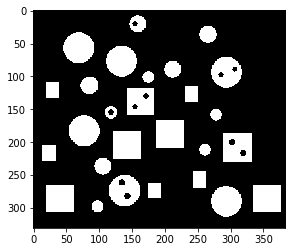

In [263]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from disjoint_set import DisjointSet
def thresholding(img,t):
    row = img.shape[0]
    col = img.shape[1]
    for i in range(row):
        for j in range(col):
            if(img[i][j]>t):
                img[i][j] = 255
            else:
                img[i][j] = 0
    return img

def Connected_Component(img,connectivity):
        #img = img /255
        ds = DisjointSet()
        rows,cols=img.shape
        new_img= np.zeros((rows,cols)).astype(np.uint8)
        rows = rows-2
        cols = cols-2
        cc=0
        # First Pass of CC (8 connectivity)
        for x in range(1,rows+1):
            prev,curr = 0,0
            for y in range(1,cols+1):
                arr = np.zeros(8)
                curr = img[x][y]
                if(curr == 0):
                    prev = curr
                elif(curr!=0):    
                    arr[1] = new_img[x-1,y]
                    arr[3] = new_img[x,y-1]
                    arr[4] = new_img[x,y+1]
                    arr[6] = new_img[x+1,y]
                    
                    if(connectivity == 8):
                        arr[0] = new_img[x-1,y-1]
                        arr[2] = new_img[x-1,y+1]
                        arr[5] = new_img[x+1,y-1]
                        arr[7] = new_img[x+1,y+1]

                    a = arr[arr!=0]

                    # if prev is zero and there are no neighbours in new img then increment cc and that will be center pixel label
                    # else if there are neighbours then minimum element will be my center pixel label and will use union_find set
                    if(prev==0 and (len(a)==0)):
                        cc = cc+1
                        new_img[x,y]=cc
                    elif(len(a)!=0):
                        #print(len(a))
                        minn = np.min(a)
                        new_img[x,y]=minn
                        #print(minn)
                        for i in range(len(a)):
                            ds.union(a[i],minn)
                prev = curr

        # Second Pass of CC
        for x in range(1,rows+1):
            for y in range(1,cols+1):
                p = new_img[x][y]
                if(p!=0):
                    new_img[x][y]=ds.find(p)

        #print(ds)
        new_img=remove_padding(new_img)
        labels = np.unique(new_img[new_img!=0])
        return new_img,len(list(ds.itersets())),labels

def IsSquare(img):
    kernel = np.ones((5,5))
    curr_img = cv.dilate(img*255, kernel, iterations=2)
    curr_img = curr_img/255
    ones_list = []
    for row in range(curr_img.shape[0]):
        count = 0
        one_spotted = False
        for col in range(curr_img.shape[1]):
            if 1 == curr_img[row][col]:
                one_spotted = True
                count += 1
            elif 0 == curr_img[row][col] and one_spotted:
                break
        if one_spotted:
            ones_list.append(count)

    min_one_in_row = min(ones_list)
    max_one_in_row = max(ones_list)
    if ((max_one_in_row - min_one_in_row) == 0):
        return True
    else:
        return False

def Identify_Square(label_img,labels):
    object_list = ObjectList(label_img,labels)
    sq_count = 0
    for obj_img in object_list:
        if(IsSquare(obj_img)):
            sq_count += 1
    print('Number of squares in image =',sq_count)
    
img = cv.imread('input_data/objects.png',0)
th = thresholding(img,127)
pad = padding(th)
label_img,ret,l = Connected_Component(pad,8)
Identify_Square(label_img,l)
plt.imshow(img,cmap='gray')
plt.show()

3. Identify the square objects that have holes

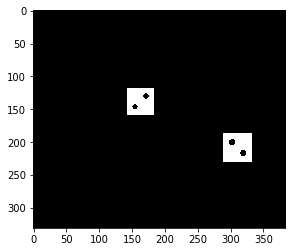

Number of squares with holes = 2


In [292]:
def Identify_Square_WithHole(label_img,labels):
    new_img = np.zeros(label_img.shape)
    object_list = ObjectList(label_img,labels)
    sq_count = 0
    holes_list = []
    for obj_img in object_list:
        if(IsSquare(obj_img)):
            sq_count += 1
            n = getNumberOfHoles(obj_img)
            if(n>0):
                   new_img = new_img + obj_img 
            holes_list= np.append(holes_list,n)
    count=0
    for val in (holes_list):
        if(val>0):
            count = count+1
    
    plt.imshow(255-new_img,cmap='gray')
    plt.show()
                
    return count

count=Identify_Square_WithHole(label_img,l)
print('Number of squares with holes =',count)

4. Identify the circular objects that have no holes


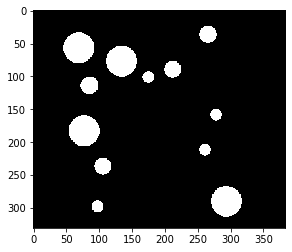

Number of circle with no holes = 12


In [293]:
def Identify_Circle_WithNoHole(label_img,labels):
    new_img = np.zeros(label_img.shape)
    object_list = ObjectList(label_img,labels)
    sq_count = 0
    holes_list = []
    for obj_img in object_list:
        if(not(IsSquare(obj_img))):
            sq_count += 1
            n = getNumberOfHoles(obj_img)
            if(n<=0):
                new_img = new_img + obj_img
        
            holes_list= np.append(holes_list,n)
    count=0
    for val in (holes_list):
        if(val<=0):
            count = count+1
    plt.imshow(255-new_img,cmap='gray')
    plt.show()
    return count

count=Identify_Circle_WithNoHole(label_img,l)
print('Number of circle with no holes =',count)

## Q5) Connected Components. In the questions below, assume 8-connectivity

### Q5.1) The image https://imgur.com/a/8wb8VsU contains text characters in ﬁve diﬀerent colors. Write a script which takes the image as input and outputs the number of components for each of the ﬁve colors. Note that the components may be non-letters 

[255 255 255]
(5, 678, 871)
Connected Component Image 1=  24
Connected Component Image 2=  27
Connected Component Image 3=  74
Connected Component Image 4=  165
Connected Component Image 5=  34


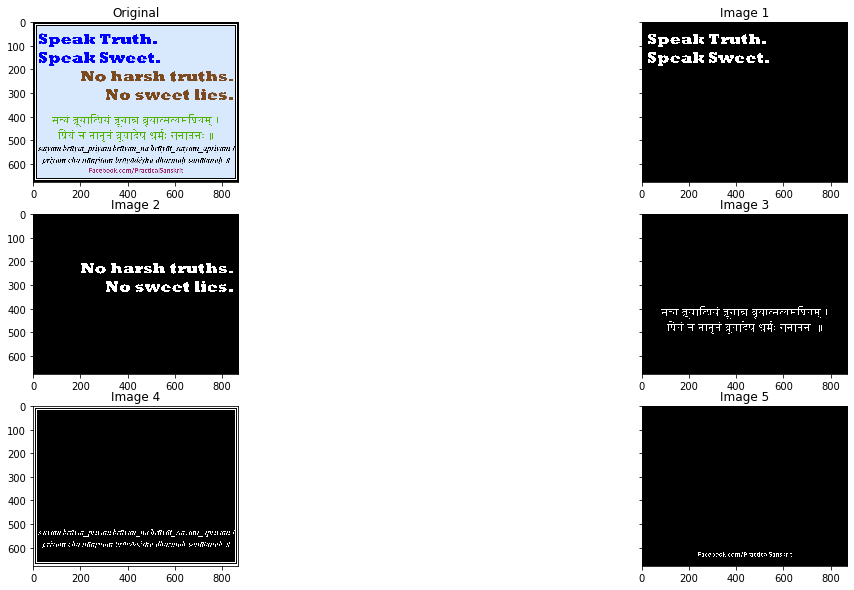

In [131]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from disjoint_set import DisjointSet

img = cv.imread('input_data/q5_1.png')

def thresholding(img,t):
    row = img.shape[0]
    col = img.shape[1]
    for i in range(row):
        for j in range(col):
            if(img[i][j]>t):
                img[i][j] = 255
            else:
                img[i][j] = 0
    return img

def padding(img):
        row,col = img.shape
        new_img = np.zeros((row+2,col+2))
        for i in range(row):
            for j in range(col):
                new_img[i+1][j+1] = img[i][j]
        return new_img

def remove_padding(img):
        row,col = img.shape
        new_img = np.zeros((row-2,col-2))
        for i in range(1,row-1):
            for j in range(1,col-1):
                new_img[i-1][j-1] = img[i][j]
        return new_img

def Connected_Component(img,connectivity):
        #img = img /255
        ds = DisjointSet()
        rows,cols=img.shape
        new_img= np.zeros((rows,cols)).astype(np.uint8)
        rows = rows-2
        cols = cols-2
        cc=0
        # First Pass of CC (8 connectivity)
        for x in range(1,rows+1):
            prev,curr = 0,0
            for y in range(1,cols+1):
                arr = np.zeros(8)
                curr = img[x][y]
                if(curr == 0):
                    prev = curr
                elif(curr!=0):    
                    arr[1] = new_img[x-1,y]
                    arr[3] = new_img[x,y-1]
                    arr[4] = new_img[x,y+1]
                    arr[6] = new_img[x+1,y]
                    
                    if(connectivity == 8):
                        arr[0] = new_img[x-1,y-1]
                        arr[2] = new_img[x-1,y+1]
                        arr[5] = new_img[x+1,y-1]
                        arr[7] = new_img[x+1,y+1]

                    a = arr[arr!=0]

                    # if prev is zero and there are no neighbours in new img then increment cc and that will be center pixel label
                    # else if there are neighbours then minimum element will be my center pixel label and will use union_find set
                    if(prev==0 and (len(a)==0)):
                        cc = cc+1
                        new_img[x,y]=cc
                    elif(len(a)!=0):
                        #print(len(a))
                        minn = np.min(a)
                        new_img[x,y]=minn
                        #print(minn)
                        for i in range(len(a)):
                            ds.union(a[i],minn)
                prev = curr

        # Second Pass of CC
        for x in range(1,rows+1):
            for y in range(1,cols+1):
                p = new_img[x][y]
                if(p!=0):
                    new_img[x][y]=ds.find(p)

        #print(ds)
        new_img=remove_padding(new_img)
        return new_img,len(list(ds.itersets()))
    
def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(127*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue,blank_ch,blank_ch])

    # cvt to BGR for display
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    return labeled_img

def get_binary_images_for_different_colored_texts(image):
    binary_images = []
    for i in range(5):
        binary_images.append(np.zeros((image.shape[0],image.shape[1])))
    colors = [np.array([0, 0, 255]), np.array([125, 73, 31]), np.array([80, 176, 0]), \
              np.array([0, 0, 0]), np.array([160, 48, 112])]
    background_color = np.array([217, 233, 253])
    print(image[0][0])
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            if np.array_equal(background_color, image[row][col]):
                for bin_arr in binary_images:
                    bin_arr[row][col] = 0
            else:
                for color_num in range(len(colors)):
                    if np.array_equal(colors[color_num], image[row][col]):
                        binary_images[color_num][row][col] = 1
    return binary_images

img_diff=get_binary_images_for_different_colored_texts(img)
img_diff = np.array(img_diff)

print(img_diff.shape)
pad1= padding(img_diff[0])
pad2 = padding(img_diff[1])
pad3 = padding(img_diff[2])
pad4 = padding(img_diff[3])
pad5 = padding(img_diff[4])
#for i in range(5):
c1,cc1 = Connected_Component(pad1,8)
c2,cc2 = Connected_Component(pad2,8)
c3,cc3 = Connected_Component(pad3,8)
c4,cc4 = Connected_Component(pad4,8)
c5,cc5 = Connected_Component(pad5,8)

f, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, sharey=True, figsize=(20,10))
ax1.imshow(img, cmap = 'gray')
ax1.set_title('Original')

ax2.imshow(img_diff[0], cmap = 'gray')
ax2.set_title('Image 1')

ax3.imshow(img_diff[1], cmap = 'gray')
ax3.set_title('Image 2')

ax4.imshow(img_diff[2], cmap = 'gray')
ax4.set_title('Image 3')

ax5.imshow(img_diff[3], cmap = 'gray')
ax5.set_title('Image 4')

ax6.imshow(img_diff[4], cmap = 'gray')
ax6.set_title('Image 5')

print('Connected Component Image 1= ',cc1)
print('Connected Component Image 2= ',cc2)
print('Connected Component Image 3= ',cc3)
print('Connected Component Image 4= ',cc4)
print('Connected Component Image 5= ',cc5)


### Q5.2) Write a script which produces as output a binary image containing 
(a) Only those letters that enclose one empty region (e.g. examples of English letters containing a single empty region are - o,e,a) 

(b) only those letters that enclose two empty regions (e.g. example letter from English - g, B)

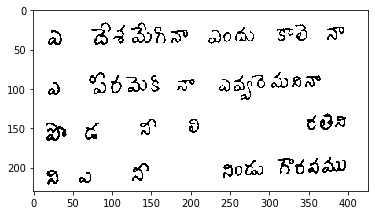

In [257]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from disjoint_set import DisjointSet

def getNumberOfHoles(img):
    row,col = img.shape
    for i in range(row):
        for j in range(col):
            if(img[i][j]==1):
                img[i][j] = 0
            else:
                img[i][j] = 1
    
    label_img,ret,l = Connected_Component(img,8)
    return ret-1

def ObjectList(label_img,labels):
    row,col = label_img.shape
    object_list =[]
    
    for label in labels:
        temp = np.zeros((row,col))
        for i in range(row):
            for j in range(col):
                if(label == label_img[i][j]):
                    temp[i][j] = 1
                    
        object_list.append(temp)
        
    return object_list
    
def N_Objects_with_holes(label_img,labels):
    new_img_one = np.zeros((label_img.shape[0],label_img.shape[1]))
    new_img_two = np.zeros((label_img.shape[0],label_img.shape[1]))
    
    object_list = ObjectList(label_img,labels)    
    holes_list=[]
    for obj_image in object_list:
        #plt.imshow(obj_image)
        #plt.show()
        n = getNumberOfHoles(obj_image)
        if(n == 1):
            new_img_one = new_img_one + obj_image
        if(n == 2):
            new_img_two = new_img_two + obj_image
            
    return new_img_one,new_img_two


def thresholding(img,t):
    row = img.shape[0]
    col = img.shape[1]
    for i in range(row):
        for j in range(col):
            if(img[i][j]>t):
                img[i][j] = 0
            else:
                img[i][j] = 255
    return img

def Binarization(img):
    row = img.shape[0]
    col = img.shape[1]
    for i in range(row):
        for j in range(col):
            if(img[i][j] == 255):
                img[i][j] = 255
            else:
                img[i][j] = 0
    return img

img = cv.imread('input_data/q5_2_a.jpg',0)
crop_img=img[60:290, 45:471]
th =thresholding(crop_img,90)            
pad = padding(th)
label_img,ret,l = Connected_Component(pad,8)
new_img_1,new_img_2=N_Objects_with_holes(label_img,l)


Text(0.5, 1.0, 'b) only those letters that enclose two empty regions ')

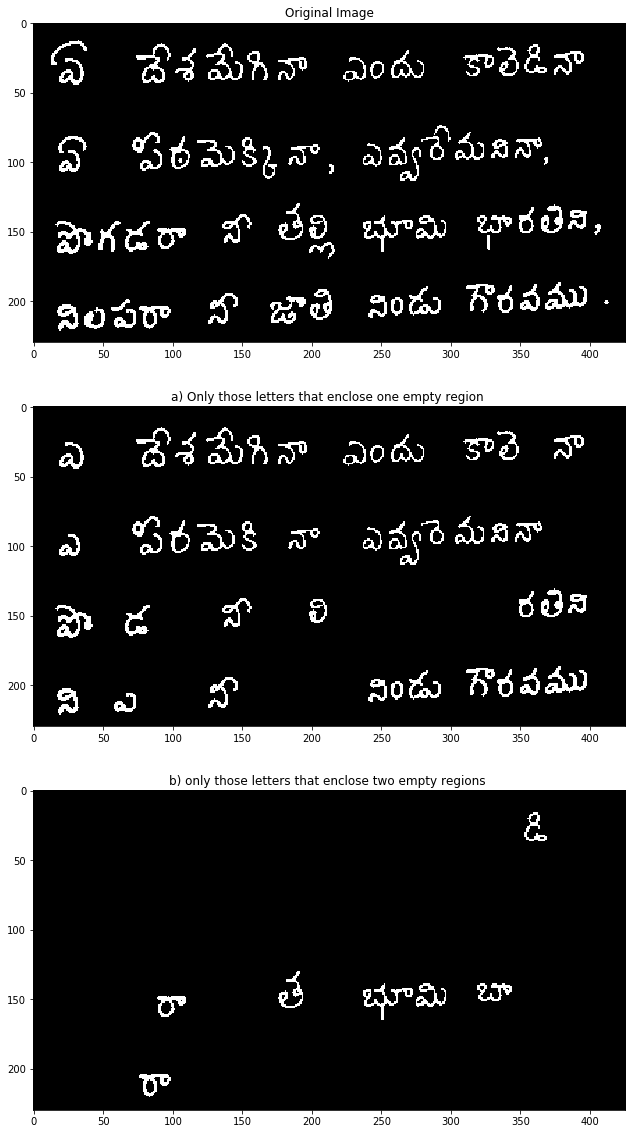

In [291]:
f, ((ax1,ax2,ax3)) = plt.subplots(3, 1, sharey=True, figsize=(20,20))
ax1.imshow(crop_img, cmap = 'gray')
ax1.set_title('Original Image')

ax2.imshow(255-new_img_1, cmap = 'gray')
ax2.set_title('a) Only those letters that enclose one empty region ')

ax3.imshow(255-new_img_2, cmap = 'gray')
ax3.set_title('b) only those letters that enclose two empty regions ')



In [362]:
def second(i):
    #img = cv.imread('DIP_2019_A4/q5_2_b.jpg', 0)
    p = img.shape[1] // 2
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if j <= p + 70:
                if img[i, j] <= 85:
                    img[i, j] = 255
                else:
                    img[i, j] = 0
            else:
                if img[i, j] <= 35:
                    img[i, j] = 255
                else:
                    img[i, j] = 0
    return img

img = cv.imread('input_data/q5_2_b.jpg',0)
cv.equalizeHist(img, img)
#c = linContrastStretching(img,np.min(img),np.max(img))
crop_img=img[0:380, 40:300]
#th = thresholding(img,198)
th = second(crop_img)

pad = padding(th)
label_img,ret,l = Connected_Component(pad,8)
new_img_1,new_img_2=N_Objects_with_holes(label_img,l)



Text(0.5, 1.0, 'b) only those letters that enclose two empty regions ')

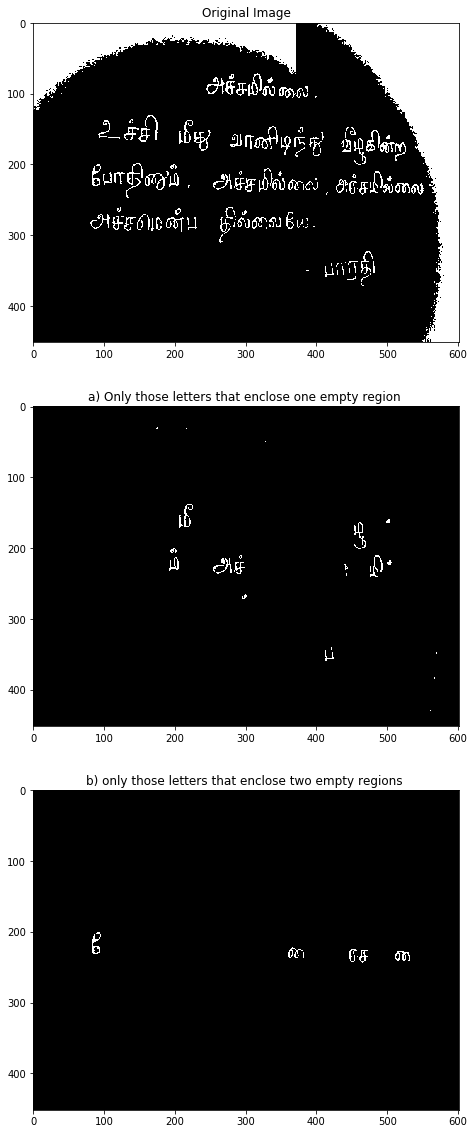

In [363]:
f, ((ax1,ax2,ax3)) = plt.subplots(3, 1, sharey=True, figsize=(20,20))
ax1.imshow(th, cmap = 'gray')
ax1.set_title('Original Image')

ax2.imshow(255-new_img_1, cmap = 'gray')
ax2.set_title('a) Only those letters that enclose one empty region ')

ax3.imshow(255-new_img_2, cmap = 'gray')
ax3.set_title('b) only those letters that enclose two empty regions ')

